# Insight-Driven Employee Retention Strategies in the `Pharmaceutical Industry`

# Introduction
Employee retention is crucial in the pharmaceutical industry due to the high costs associated with training and the loss of expertise when employees leave. This project aims to develop insight-driven strategies to improve employee retention by analyzing relevant data and building predictive models.

# Problem Statement
1. **High employee turnover in the pharmaceutical industry leads to increased costs and loss of expertise.**
2. **The goal is to identify factors contributing to employee turnover and develop strategies to retain valuable employees.**


### Objectives
1. **Identify key factors influencing employee retention.**
2. **Develop predictive models to identify employees at risk of leaving.**
3. **Provide actionable insights and recommendations to improve employee retention.**

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
warnings.filterwarnings("ignore")
sns.set_context("notebook")

In [2]:
data = pd.read_csv('Employee_Attrition.csv')
data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
print("There are {:,} rows and {} columns in the data.".format(data.shape[0], data.shape[1]))
print("There are {} missing values in the data.".format(data.isnull().sum().sum()))

There are 1,470 rows and 35 columns in the data.
There are 0 missing values in the data.


## <b><span style='color:#68A19B'>1.1</span> | Summary Statistics of numeric variables</b>

In [4]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## <b><span style='color:#68A19B'>1.2</span> | Summary Statistics of categorical variables</b>

In [5]:
# Get list of categorical columns
cat_cols = data.select_dtypes(include='object').columns.tolist()

# Create a DataFrame with counts of unique values for each categorical column
cat_df = (
    data[cat_cols]
    .melt(var_name='column', value_name='value')
    .value_counts()
    .reset_index(name='count')
    .sort_values(by=['column', 'count'])
)

# Display the description of categorical columns and the value counts DataFrame
display(data[cat_cols].describe())
display(cat_df)


,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470,1470
unique,2,3,3,6,2,9,3,1,2
top,No,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1233,1043,961,606,882,326,673,1470,1054


,column,value,count
18,Attrition,Yes,237
1,Attrition,No,1233
20,BusinessTravel,Non-Travel,150
16,BusinessTravel,Travel_Frequently,277
3,BusinessTravel,Travel_Rarely,1043
28,Department,Human Resources,63
11,Department,Sales,446
4,Department,Research & Development,961
30,EducationField,Human Resources,27
26,EducationField,Other,82


# Exploratory Data Analysis

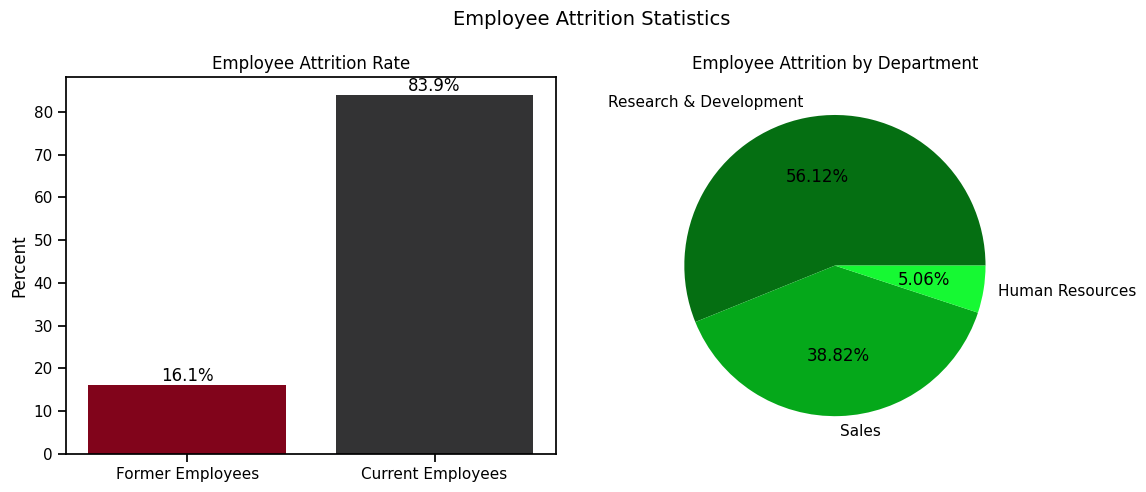

In [6]:
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle("Employee Attrition Statistics", fontsize=14)

# Bar chart
attrition_data = data['Attrition'].value_counts(normalize=True) * 100
labels = ['Former Employees', 'Current Employees']  
ax1.bar(labels, attrition_data[::-1], color=['#81041B', '#333334']) 
ax1.set_ylabel('Percent')
ax1.set_title('Employee Attrition Rate')
for i, v in enumerate(attrition_data[::-1]):  # Reversed data for text
    ax1.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

# Pie chart
dept_data = data[data.Attrition == 'Yes']['Department'].value_counts(normalize=True) * 100
ax2.pie(dept_data, labels=dept_data.index, autopct='%1.2f%%', 
        colors=['#056F12', '#05A81A', '#16F933'])
ax2.set_title('Employee Attrition by Department')

plt.tight_layout()
plt.show()

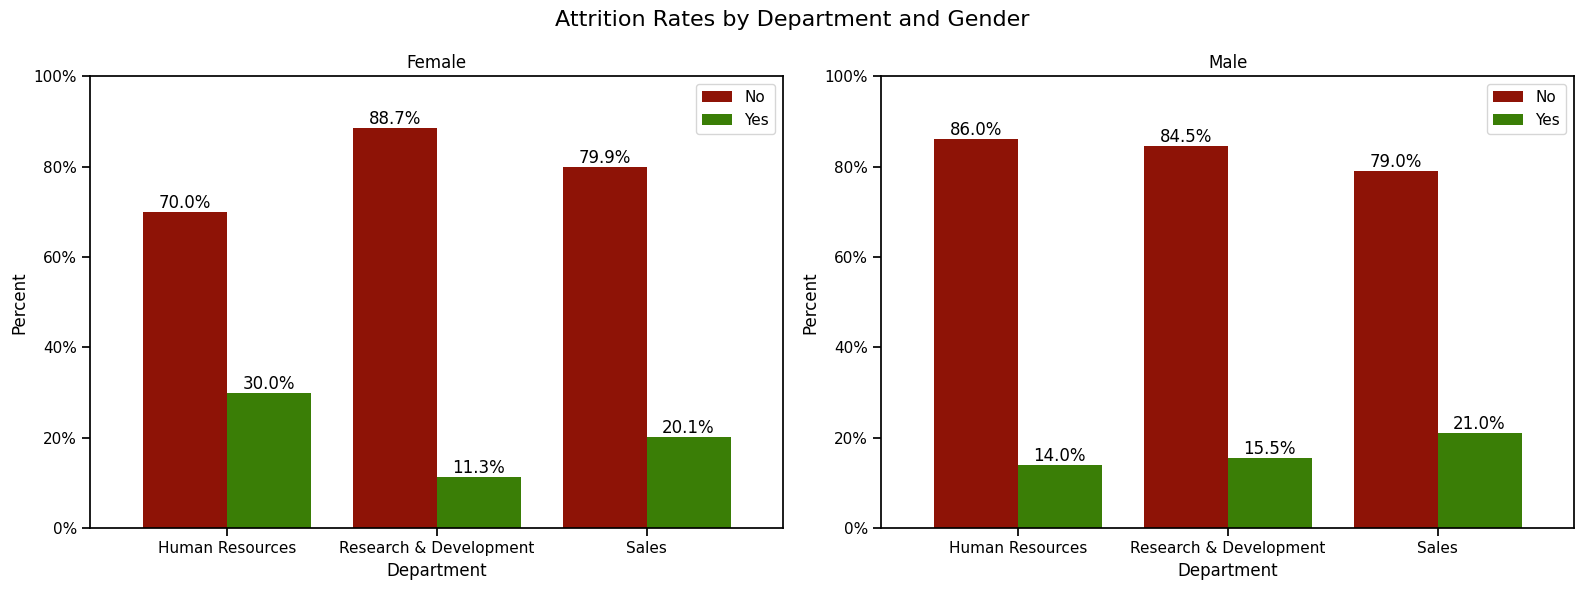

In [7]:
# Prepare data
plot_df = data.groupby(['Gender', 'Department', 'Attrition']).size().unstack(fill_value=0)
plot_df = plot_df.div(plot_df.sum(axis=1), axis=0) * 100

# Set up plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Attrition Rates by Department and Gender', fontsize=16)

# Function to plot grouped bars
def plot_bars(ax, data, title):
    data.plot(kind='bar', ax=ax, width=0.8, color=['#8E1306', '#3A7E06'])
    ax.set_title(title)
    ax.set_ylabel('Percent')
    ax.set_ylim(0, 100)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}%'))
    ax.legend(['No', 'Yes'])
    
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%')
    
    # Rotate x-axis labels
    plt.setp(ax.get_xticklabels(), rotation=0)

# Plot for each gender
plot_bars(ax1, plot_df.loc['Female'], 'Female')
plot_bars(ax2, plot_df.loc['Male'], 'Male')

plt.tight_layout()
plt.show()

Women in `Human Resources` experienced the highest amount of turnover, with nearly 1 out of every 3 women in HR leaving the company. For men, the highest turnover occurred in the `Sales department`.

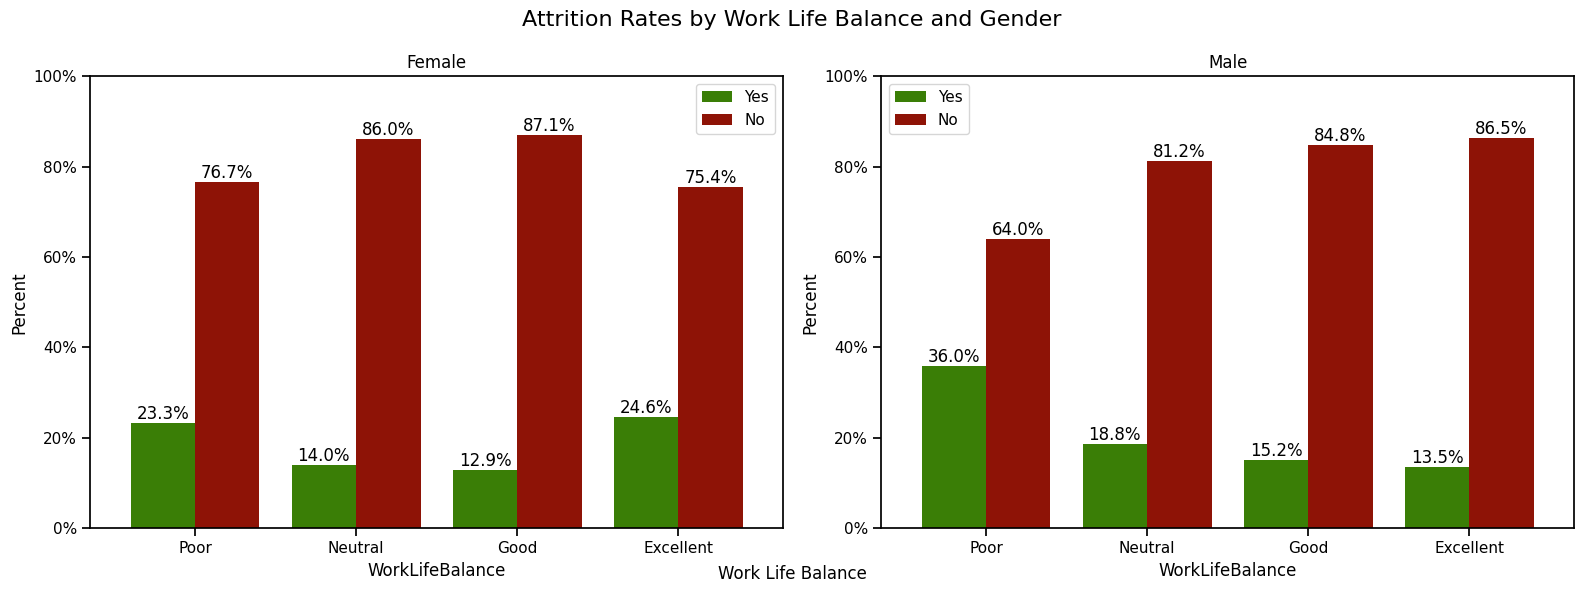

In [8]:
# Prepare the data
plot_df = data.groupby(['WorkLifeBalance', 'Gender', 'Attrition']).size().unstack(level='Attrition', fill_value=0)
plot_df = plot_df.div(plot_df.sum(axis=1), axis=0) * 100
plot_df = plot_df.reset_index()

# Set up the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Attrition Rates by Work Life Balance and Gender', fontsize=16)

def plot_grouped_bars(ax, data, title):
    data.plot(
        x='WorkLifeBalance', y=['Yes', 'No'], kind='bar', ax=ax, 
        width=0.8, color=['#3A7E06', '#8E1306']
    )
    ax.set_ylabel('Percent')
    ax.set_title(title)
    ax.set_xticklabels(['Poor', 'Neutral', 'Good', 'Excellent'], rotation=0)
    ax.legend(['Yes', 'No'])
    ax.set_ylim(0, 100)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}%'))
    
    for container in ax.containers:
        ax.bar_label(container, fmt='%.1f%%')

# Plot for each gender
plot_grouped_bars(ax1, plot_df[plot_df['Gender'] == 'Female'], 'Female')
plot_grouped_bars(ax2, plot_df[plot_df['Gender'] == 'Male'], 'Male')

plt.tight_layout()
fig.text(0.5, 0.04, 'Work Life Balance', ha='center', va='center')
plt.show()

Among women, those with an `excellent` work-life balance had the highest attrition rate at 24.6%, followed closely by those with a `poor` work-life balance at 23.3%. Women with a neutral work-life balance had an attrition rate of 14.0%, and those with a good work-life balance had the lowest rate at 12.9%.

For men, the highest attrition rate was among those with a `poor` work-life balance at 36.0%. Men with a neutral work-life balance had an attrition rate of 18.8%, followed by those with a good work-life balance at 15.2%. Men with an excellent work-life balance had the lowest attrition rate at 13.5%.

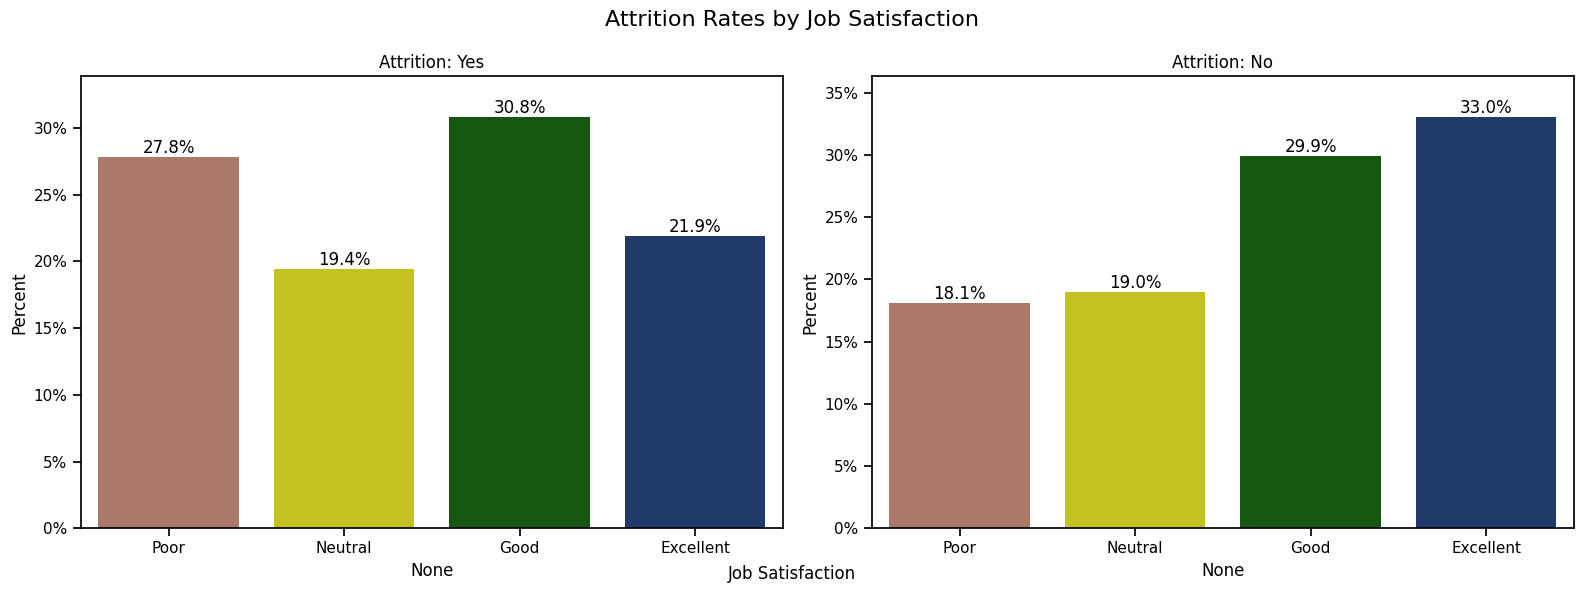

In [9]:
# Prepare the data
plot_df = data.groupby(['Attrition', 'JobSatisfaction']).size().unstack(fill_value=0)
plot_df = plot_df.div(plot_df.sum(axis=1), axis=0) * 100

# Rename JobSatisfaction categories
satisfaction_map = {1: 'Poor', 2: 'Neutral', 3: 'Good', 4: 'Excellent'}
plot_df.columns = [satisfaction_map.get(col, col) for col in plot_df.columns]

# Set up the plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Attrition Rates by Job Satisfaction', fontsize=16)

# Define colors
colors = ['#B6735F', '#DFDC07', '#0E6105', '#143776']

# Function to plot bars
def plot_bars(ax, data, title):
    sns.barplot(x=data.index, y=data.values, ax=ax, palette=colors)
    ax.set_title(title)
    ax.set_ylabel('Percent')
    ax.set_ylim(0, data.max() * 1.1)
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'{x:.0f}%'))
    
    for i, v in enumerate(data):
        ax.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

# Plot for each attrition category
plot_bars(ax1, plot_df.loc['Yes'], 'Attrition: Yes')
plot_bars(ax2, plot_df.loc['No'], 'Attrition: No')

plt.tight_layout()
fig.text(0.5, 0.04, 'Job Satisfaction', ha='center', va='center')
plt.show()

Among employees who left, the majority were satisfied in their job with `53% rating their job satisfaction as Good or Excellent`, while `28% were the least satisfied in their job`.

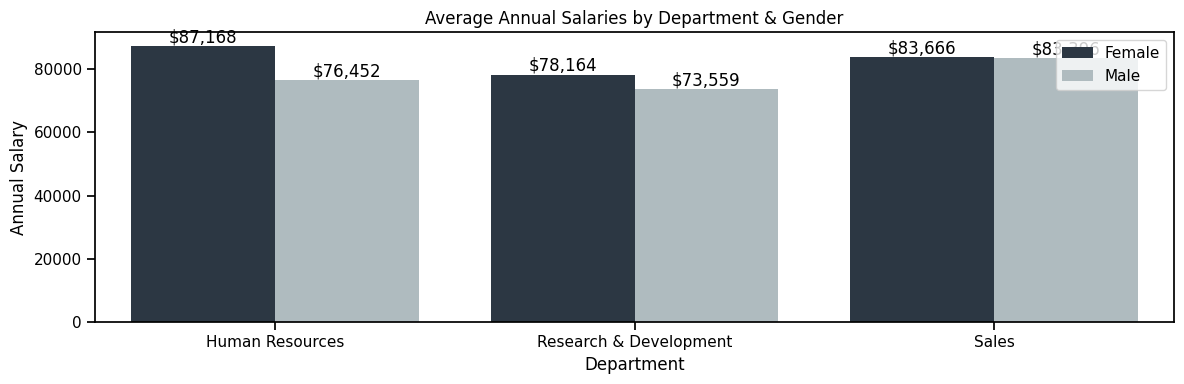

In [10]:
# Calculate average annual salary by Department and Gender
average_salary = data.groupby(['Department', 'Gender'])['MonthlyIncome'].mean() * 12
average_salary = average_salary.rename('AnnualSalary').reset_index()

# Set up the plot
plt.figure(figsize=(12, 4))

# Create the grouped bar plot
ax = sns.barplot(x='Department', y='AnnualSalary', hue='Gender', data=average_salary,
                 palette={'Female': '#283747', 'Male': '#ACBCC2'})

# Customize the plot
ax.set_ylabel('Annual Salary')
ax.set_title('Average Annual Salaries by Department & Gender')
plt.xticks(rotation=0)

plt.legend(loc='upper right')

# Add value labels on top of each bar
for container in ax.containers:
    ax.bar_label(container, fmt='${:,.0f}', label_type='edge')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

Across each department, women on average have higher salaries than men. 

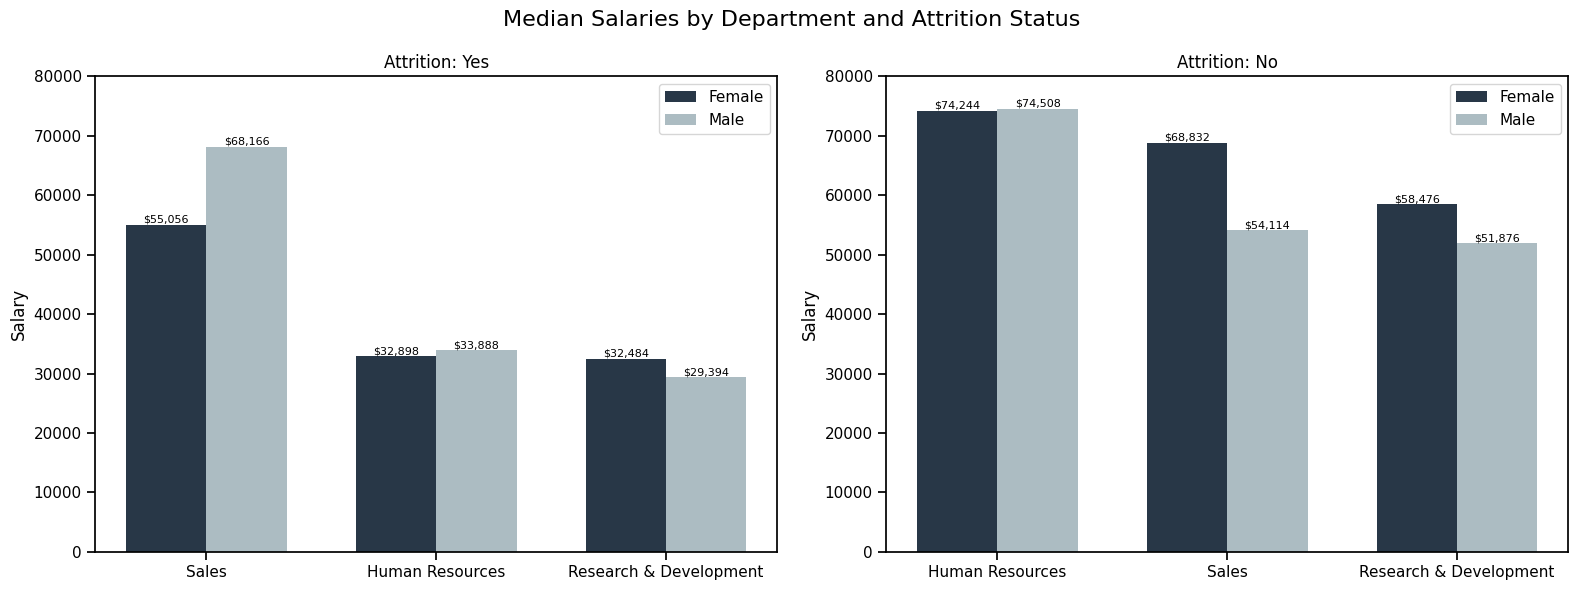

In [11]:
# Prepare data
plot_df = data.groupby(['Department', 'Attrition', 'Gender'])['MonthlyIncome'].median() * 12
plot_df = plot_df.reset_index(name='Salary').sort_values(['Gender', 'Salary'], ascending=[True, False])

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
fig.suptitle('Median Salaries by Department and Attrition Status', fontsize=16)

# Function to plot bars
def plot_bars(ax, data, title):
    departments = data['Department'].unique()
    x = np.arange(len(departments))
    width = 0.35
    
    colors = ['#283747', '#ACBCC2'] 
    
    for i, gender in enumerate(['Female', 'Male']):
        salaries = data[data['Gender'] == gender]['Salary']
        ax.bar(x + (i-0.5)*width, salaries, width, label=gender, color=colors[i])
        
        for j, v in enumerate(salaries):
            ax.text(x[j] + (i-0.5)*width, v, f'${v:,.0f}', ha='center', va='bottom', fontsize=8)
    
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(departments)
    ax.set_ylabel('Salary')
    ax.set_ylim(0, 80000)
    ax.legend()

# Plot for each attrition status
plot_bars(ax1, plot_df[plot_df['Attrition'] == 'Yes'], 'Attrition: Yes')
plot_bars(ax2, plot_df[plot_df['Attrition'] == 'No'], 'Attrition: No')

plt.tight_layout()
plt.show()


In comparison to current employees, former employees had lower median salaries across all three departments. In `Human Resources`, women tend to have higher median salaries than men.

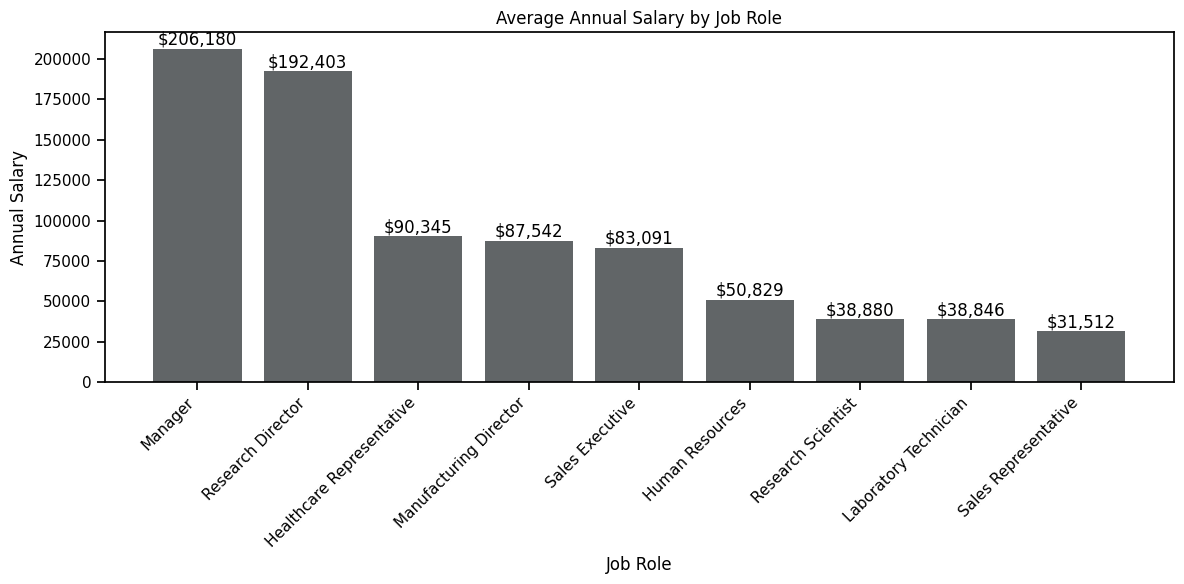

In [12]:
# Prepare data
plot_df = data.groupby('JobRole')['MonthlyIncome'].mean() * 12
plot_df = plot_df.sort_values(ascending=False)

# Create the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars and add labels in one step
bars = ax.bar(plot_df.index, plot_df.values, color='#616567')
ax.bar_label(bars, labels=[f'${x:,.0f}' for x in plot_df.values], label_type='edge')

# Customize the plot
ax.set_xlabel('Job Role')
ax.set_ylabel('Annual Salary')
ax.set_title('Average Annual Salary by Job Role')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

`Managers` and `Research Directors` have the highest average salaries, while Laboratory Technicians and Sales Representatives have the lowest.

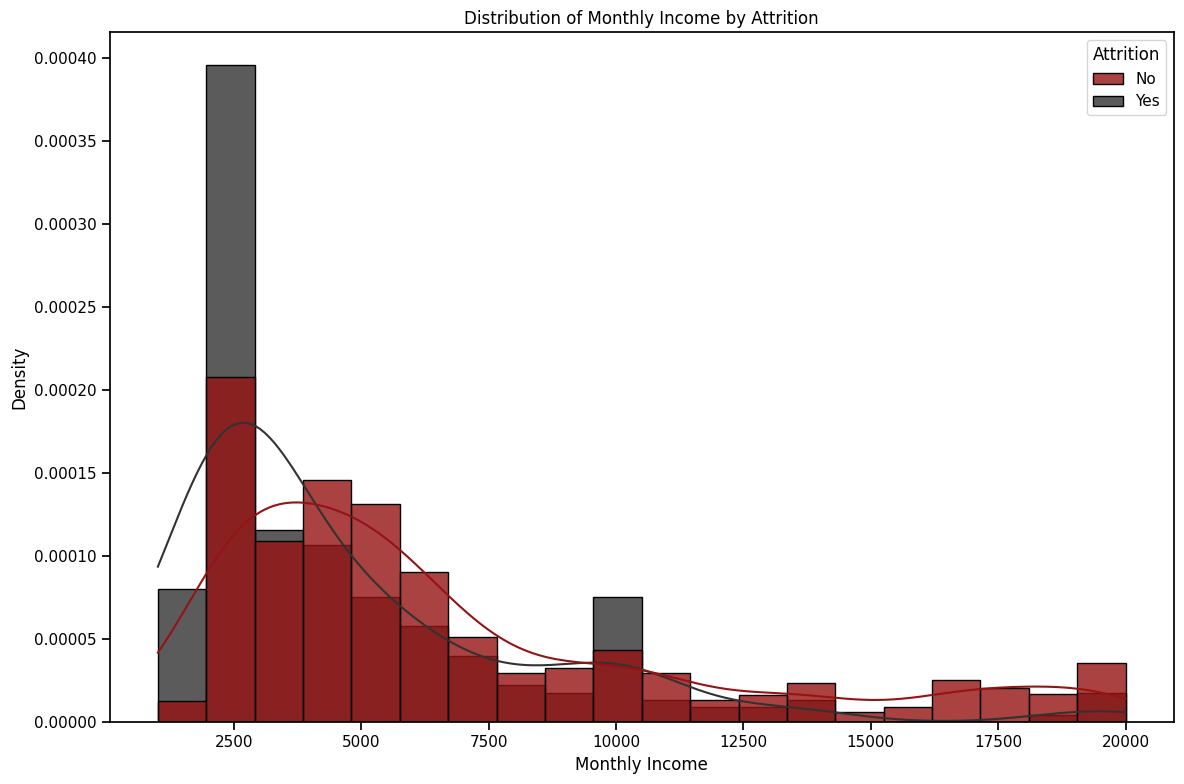

In [13]:
# Prepare data
plot_df = data.sort_values(by="Attrition")

# Create the plot
plt.figure(figsize=(12, 8))

# Histogram with density
sns.histplot(data=plot_df, x='MonthlyIncome', hue='Attrition', kde=True, 
             stat='density', common_norm=False, alpha=0.8, 
             palette={'Yes': '#323232', 'No': '#961313'})

plt.title('Distribution of Monthly Income by Attrition')
plt.xlabel('Monthly Income')
plt.ylabel('Density')

# Adjust layout and display the plot
plt.tight_layout()
plt.show()


The distribution of monthly income for both current and former employees is positively skewed and lower overall among staff who left. 
`Lower-income` employees appear more likely to leave the company.
`Higher-income` employees seem more likely to stay.
There may be other factors influencing attrition at certain income levels (e.g., the spike at $10,000).

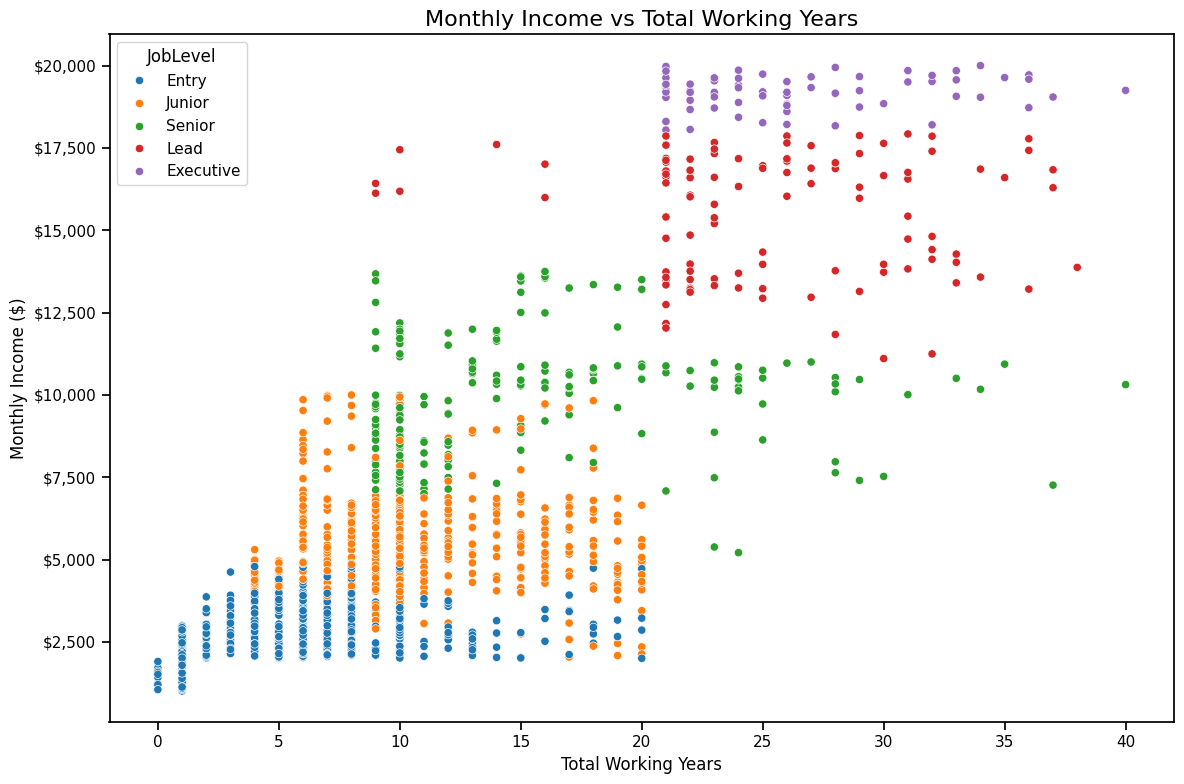

In [14]:
plot_df = data.copy()

# Ensure JobLevel is categorical and properly ordered
plot_df['JobLevel'] = pd.Categorical(plot_df['JobLevel'], categories=[1, 2, 3, 4, 5], ordered=True)
plot_df['JobLevel'] = plot_df['JobLevel'].cat.rename_categories(['Entry', 'Junior', 'Senior', 'Lead', 'Executive'])

# Set up the plot
fig, ax3 = plt.subplots(figsize=(12, 8))

# Scatter plot
sns.scatterplot(data=plot_df, x='TotalWorkingYears', y='MonthlyIncome', hue='JobLevel', ax=ax3)
ax3.set_title('Monthly Income vs Total Working Years', fontsize=16)
ax3.set_xlabel('Total Working Years', fontsize=12)
ax3.set_ylabel('Monthly Income ($)', fontsize=12)
ax3.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, p: f'${x:,.0f}'))

plt.tight_layout()
plt.show()


Based on the scatterplot above, monthly income is positively correlated with total number of years worked and there is strong association between an employee's earnings and their job level.

# Data Cleaning and Preprocessing

There are several columns in the data that have numeric values that represent categories, like `Education` that has values of 1 through 5 representing different levels of education. These columns were converted to categorical variables to perform significance testing for feature selection. I then removed columns with zero variance from the data since these can lead to errors in model fitting. Lastly, to reduce the skewness in the data, I log-transformed variables that had a skewness above 0.75.

In [15]:
def preprocess_data(data, cat_cols):
    # Remove zero variance columns and EmployeeNumber
    nzv = [col for col in data.columns if data[col].nunique() == 1]
    df = data.drop(columns=nzv + ['EmployeeNumber'])
    
    # Convert categorical columns to category dtype
    for col in set(cat_cols) - {'Attrition'}:
        df[col] = df[col].astype('category')
    
    print("Dropped variables:", nzv)
    return df

# Example usage
cat_cols = ['Gender', 'Department', 'EducationField', 'JobRole', 'MaritalStatus', 'OverTime', 'Attrition']
df = preprocess_data(data, cat_cols)
print(df.shape)

Dropped variables: ['EmployeeCount', 'Over18', 'StandardHours']
(1470, 31)


In [16]:
def identify_and_transform_skewed(df, skew_limit=0.75):
    # Identify skewed columns
    skew_cols = df.select_dtypes(include=['float64', 'int64']).agg(['skew']).T
    skew_cols = skew_cols[skew_cols['skew'].abs() > skew_limit]
    
    # Display skewed columns
    print("Columns to be log-transformed:")
    display(skew_cols)
    
    # Log-transform skewed columns
    for col in skew_cols.index:
        df[col] = np.log1p(df[col])
    
    return df

df = identify_and_transform_skewed(data.copy())

Columns to be log-transformed:


,skew
DistanceFromHome,0.958118
JobLevel,1.025401
MonthlyIncome,1.369817
NumCompaniesWorked,1.026471
PercentSalaryHike,0.821128
PerformanceRating,1.921883
StockOptionLevel,0.968980
TotalWorkingYears,1.117172
YearsAtCompany,1.764529
YearsInCurrentRole,0.917363


# Independent T-Test

To compare the average monthly income among current and former employees, I'll perform an independent t-test. This will allow us to determine whether there is a statistically significant difference between the average incomes of the two populations. To test this, I'll use the log-transformed data since one of the assumptions of the test is that the continuous variable is approximately normally distributed.

#### Hypothesis:

**1.The null hypothesis for the t-test is that the average monthly income of former employees is the same as current employees.** 

  u1 = u2
  
**2.The alternative hypothesis is that the average monthly income of former employees is different than current employees.**

  u1!=u2


In [17]:
import researchpy as rp
# Perform t-test
summary, res = rp.ttest(
    group1=df['MonthlyIncome'][df['Attrition'] == 'Yes'], 
    group2=df['MonthlyIncome'][df['Attrition'] == 'No'], 
    group1_name='Former Employees', 
    group2_name='Current Employees'
)

print("\nSummary Statistics:")
display(summary)
display(res)


Summary Statistics:


,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,Former Employees,237.0,8.252532,0.640059,0.041576,8.170624,8.334440
1,Current Employees,1233.0,8.610458,0.653497,0.018611,8.573946,8.646970
2,combined,1470.0,8.552752,0.664313,0.017327,8.518764,8.586739


,Independent t-test,results
0,Difference (Former Employees - Current Employe...,-0.3579
1,Degrees of freedom =,1468.0000
2,t =,-7.7477
3,Two side test p value =,0.0000
4,Difference < 0 p value =,0.0000
5,Difference > 0 p value =,1.0000
6,Cohen's d =,-0.5495
7,Hedge's g =,-0.5492
8,Glass's delta1 =,-0.5592
9,Point-Biserial r =,-0.1982


The p-value of the `t-test` is `0`, which is less than the significance level of `0.05`. This indicates strong evidence to support that the average monthly income of former employees differs significantly from that of current employees.

# Chi-Square Test of Independence

To determine if there is a relationship between `Attrition` and the other categorical variables in the data set, I will use the chi-square test of independence. The null hypothesis for this test is that the variables are independent, there is no association between `Attrition` and the variable being tested, while the alternative hypothesis is that that there is a relationship.

In [18]:
# Select categorical columns excluding 'Attrition'
cat_cols = df.select_dtypes(include=['object', 'category']).columns.drop('Attrition')

# Perform chi-square test for each categorical column
chi_results = [(col, *chi2_contingency(pd.crosstab(df['Attrition'], df[col]))[:3]) for col in cat_cols]

# Create and display DataFrame with significant results
chi_df = pd.DataFrame(chi_results, columns=["Variable", "Chi2_Statistic", "P_value", "Degrees_of_Freedom"])
significant_chi_df = chi_df[chi_df["P_value"] < 0.05].sort_values("P_value")
display(significant_chi_df)

# Print result for independent variables
for col, _, p, _ in chi_results:
    if p >= 0.05:
        print(f"Attrition and {col} are independent (p-value = {p:.4f}).")


,Variable,Chi2_Statistic,P_value,Degrees_of_Freedom
7,OverTime,87.564294,8.158424e-21,1
4,JobRole,86.190254,2.752482e-15,8
5,MaritalStatus,46.163677,9.455511e-11,2
0,BusinessTravel,24.182414,5.608614e-06,2
1,Department,10.796007,4.525607e-03,2
2,EducationField,16.024674,6.773980e-03,5


Attrition and Gender are independent (p-value = 0.2906).
Attrition and Over18 are independent (p-value = 1.0000).


Based on the chi-square test results, significant factors for employee attrition include `overtime`, `job role`, `marital status`, `department`, and `education field` (p-value < 0.05). The `strongest factor is overtime` (p-value = 8.16e-21), followed by job role (p-value = 2.75e-15) and marital status (p-value = 9.46e-11).

Independent variables like `gender` (p-value = 0.29) and `over18` (p-value = 1.00) will be removed as they don't significantly relate to attrition.

# Predicting Employee Attrition

# Encode Categorical Columns

In [19]:

# Set random seed for reproducib
np.random.seed(42)

def prepare_data(df, target_col, vars_to_dummify):
    y = (df[target_col] == 'Yes').astype(int)
    X = pd.get_dummies(df.drop(columns=target_col), columns=vars_to_dummify, drop_first=True)
    X.columns = X.columns.str.replace(' ', '')
    return X, y

vars_to_dummify = chi_df['Variable'].tolist()
X, y = prepare_data(df, 'Attrition', vars_to_dummify)
X.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_LaboratoryTechnician,JobRole_Manager,JobRole_ManufacturingDirector,JobRole_ResearchDirector,JobRole_ResearchScientist,JobRole_SalesExecutive,JobRole_SalesRepresentative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,0.693147,2,1,1,2,94,3,1.098612,...,False,False,False,False,False,True,False,False,True,True
1,49,279,2.197225,1,1,2,3,61,2,1.098612,...,False,False,False,False,True,False,False,True,False,False
2,37,1373,1.098612,2,1,4,4,92,2,0.693147,...,True,False,False,False,False,False,False,False,True,True
3,33,1392,1.386294,4,1,5,4,56,3,0.693147,...,False,False,False,False,True,False,False,True,False,True
4,27,591,1.098612,1,1,7,1,40,3,0.693147,...,True,False,False,False,False,False,False,True,False,False


# Create Training, Validation, and Test Sets

In [20]:
# Train-Validation-Test Split
# Use stratify parameter for balanced splits
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.8, stratify=y, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, stratify=y_rem, random_state=42)

print(f"Train Shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set Shape: {X_val.shape}, {y_val.shape}")
print(f"Test set Shape: {X_test.shape}, {y_test.shape}")

Train Shape: (1176, 47), (1176,)
Validation set Shape: (147, 47), (147,)
Test set Shape: (147, 47), (147,)


# Scale Features

In [21]:
# Scaling and Combining Data
# Create a list of numerical and categorical columns
numeric_columns = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numeric columns of X_train
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train[numeric_columns]), columns=numeric_columns, index=X_train.index)

# Transform the numeric columns of X_val and X_test
X_val_scaled = pd.DataFrame(scaler.transform(X_val[numeric_columns]), columns=numeric_columns, index=X_val.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test[numeric_columns]), columns=numeric_columns, index=X_test.index)

# Combine scaled numeric columns with categorical columns
X_train_final = pd.concat([X_train_scaled, X_train[categorical_columns].reset_index(drop=True)], axis=1)
X_val_final = pd.concat([X_val_scaled, X_val[categorical_columns].reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test_scaled, X_test[categorical_columns].reset_index(drop=True)], axis=1)

X_train_final.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_LaboratoryTechnician,JobRole_Manager,JobRole_ManufacturingDirector,JobRole_ResearchDirector,JobRole_ResearchScientist,JobRole_SalesExecutive,JobRole_SalesRepresentative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
1194,1.090194,1.049455,-1.046437,1.064209,0.0,1.101379,-0.658710,-0.908436,1.795282,1.631960,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
128,-1.634828,-0.523449,-1.046437,-1.855332,0.0,-1.412792,0.260202,1.694111,0.373564,-1.121894,...,False,False,False,False,True,False,False,False,True,True
810,0.981193,-0.992080,-0.711628,-1.855332,0.0,0.180462,-1.577622,-0.662913,0.373564,1.631960,...,False,False,True,False,False,False,False,False,True,False
478,-1.307825,-0.453653,0.746362,-1.855332,0.0,-0.618667,-0.658710,-1.252169,0.373564,-1.121894,...,False,False,False,False,False,True,False,True,False,False
491,0.654191,0.491086,0.354769,2.037390,0.0,-0.588638,1.179114,0.319180,0.373564,0.096706,...,False,False,False,False,True,False,False,True,False,False


#  Tune Parameters of Random Forest

In [22]:
#  Randomized Search CV and Model Training
# Set random seed for reproducibility
random_seed = 42

# Identify categorical and numerical columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

# Create preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=random_seed))
])

# Parameter tuning
param_grid = {
    'classifier__n_estimators': np.linspace(100, 500, 5, dtype=int),
    'classifier__max_features': [None, 'sqrt'],
    'classifier__max_depth': [None, 5, 7, 14, 21],
    'classifier__min_samples_split': [2, 5, 8],
    'classifier__min_samples_leaf': [3, 4, 5],
    'classifier__bootstrap': [True, False]
}

# Randomized Search CV
rf_cv = RandomizedSearchCV(pipeline, param_grid, scoring='roc_auc', 
                           n_iter=150, cv=10, random_state=random_seed, n_jobs=-1)

# Fit the model
rf_cv.fit(X_train, y_train)  # Use original X_train and y_train without final transformations

# Print results
print(f"Best Params: {rf_cv.best_params_}")

Best Params: {'classifier__n_estimators': 100, 'classifier__min_samples_split': 2, 'classifier__min_samples_leaf': 5, 'classifier__max_features': None, 'classifier__max_depth': None, 'classifier__bootstrap': True}


# Feature importance

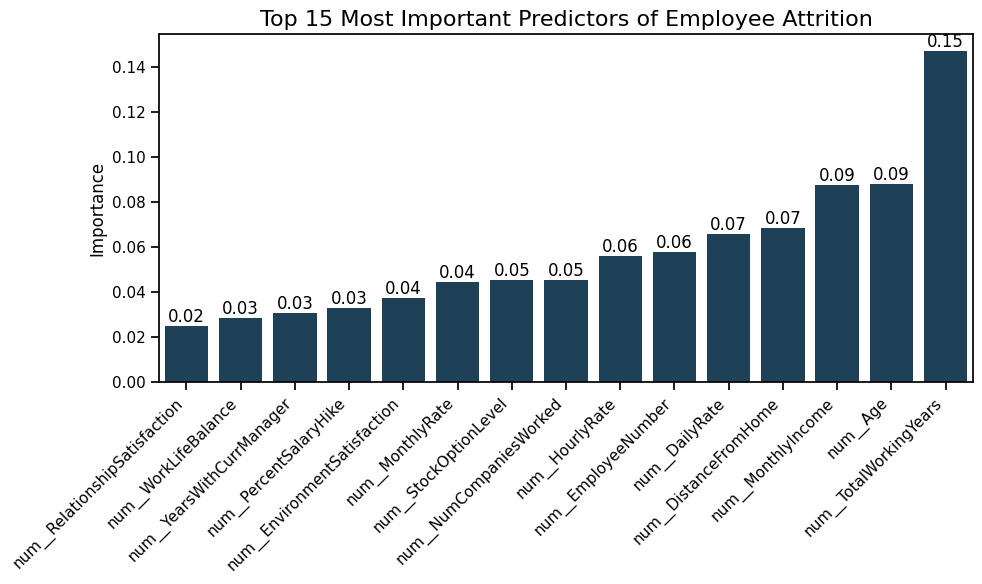

In [23]:
#  Feature Importance and Visualization
# Get the best estimator
best_estimator = rf_cv.best_estimator_

# Extract the classifier and preprocessor
rf_classifier = best_estimator.named_steps['classifier']
preprocessor = best_estimator.named_steps['preprocessor']

# Get feature names from the entire preprocessor
feature_names = preprocessor.get_feature_names_out()

# Create feature importance dataframe
feat_importance = pd.DataFrame({"Importance": rf_classifier.feature_importances_}, index=feature_names)
top_15 = feat_importance.nlargest(15, 'Importance').sort_values(by="Importance")

# Create the plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_15.index, y='Importance', data=top_15, color='#154360')
plt.title('Top 15 Most Important Predictors of Employee Attrition', fontsize=16)
plt.xlabel('')
plt.ylabel('Importance', fontsize=12)
plt.xticks(rotation=45, ha='right')
for i, v in enumerate(top_15['Importance']):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom')
plt.tight_layout()
plt.show()

This bar graph shows the top predictors of employee attrition based on random forest's Gini importance. `Monthly income`, `age`, and `overtime` are the most important factors. Job history details like total working years, tenure with the company and manager, proximity to the office, and salary increases are also key contributors.

# Model evaluation

In [24]:
# Make predictions using the best estimator
val_pred = rf_cv.best_estimator_.predict(X_val)
test_pred = rf_cv.best_estimator_.predict(X_test)

# Calculate accuracy for validation and test sets
val_acc = accuracy_score(y_val, val_pred)
test_acc = accuracy_score(y_test, test_pred)

# Print results
print(f"Validation Accuracy: {val_acc * 100:.1f}%")
print(f"Test Accuracy: {test_acc * 100:.1f}%")


Validation Accuracy: 83.0%
Test Accuracy: 82.3%


# Conclusion
Based on the results from our analysis, our Random Forest model has demonstrated strong performance in predicting employee attrition, achieving `Validation Accuracy: 83.0%` and `Test Accuracy: 82.3%`. This indicates high accuracy in distinguishing between employees who stayed and those who left the company.

In the last quarter, 16% of employees left the company, with a notable concentration in the Research & Development department. Interestingly, the Human Resources department saw the highest turnover rate among women. Employees with lower work-life balance scores were particularly susceptible to leaving, with approximately 25% departing. Surprisingly, most departing employees rated their job satisfaction as good or excellent. Those who left typically earned less, with a median monthly income approximately $2,000 lower than current employees.

According to our model, key predictors of attrition include `age`, `income`, `tenure`, and `job history` within the company. Factors such as `education level`, `performance rating`, and `gender` did not show significant impact on employee attrition.
